<h2> Ford GoBike System Data Exploration - Feb2019</h2>
<h4> By Mohamed Bayoumi </h4>

# Table of Contents
1. Introduction
2. Data Gathering
3. Data Cleaning
4. Exploration Data Analysis (EDA)
    * Univariate
    * Bivariate
    * Multivariate
8. Conclusions

<h2> 1. Introduction </h2>

This project demonstrate the importance of data visualization techniques in the data analysis process which is as project part of the Udacity Data Analysis Nanodegree course.

In the followong part, i will use Python visualization libraries to wrangle and explore a Feb-2019-fordgobike-tripdata datafile, starting from plots of single variables and building up to plots of multiple variables.

In the following second part of the project, i will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in the selected dataset.

<h2> 2. Data Gathering </h2>

In [44]:
# import neccessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [45]:
# read data and take a look at the header
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<h2> 3. Data Cleaning </h2>

In [46]:
#check the df primary info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [47]:
# set dates datatype to timestamps and seperate day and time

df['start_time'] = pd.to_datetime(df['start_time']) 
df['end_time'] = pd.to_datetime(df['end_time'])

In [48]:
# Seperate columns of date to date, day and month

df['start_date'] =  pd.to_datetime(df['start_time'], format='%Y-%m-%d')
df['month'] = df['start_date'].apply(lambda r:r.month).astype(int)
df['day'] = df['start_date'].apply(lambda r:r.day).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [49]:
# extract start_time weekdays and start hour
df['start_time_weekday']=df['start_date'].dt.strftime('%a')
df['start_hour_of_day'] = df['start_date'].dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month,day,start_time_weekday,start_hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019-02-28 17:32:10.145,2,28,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2019-02-28 18:53:21.789,2,28,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019-02-28 12:13:13.218,2,28,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019-02-28 17:54:26.010,2,28,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019-02-28 23:54:18.549,2,28,Thu,23


In [50]:
# adding duration in minutes and hours

df['duration_min']=df['duration_sec']/60
df['duration_hr']=df['duration_min']/60
df['duration_min']=df['duration_min'].astype(float)
df['duration_hr']=df['duration_hr'].astype(float)

In [51]:
#set user_type, gender and bike_share_for_all_trip to category

df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [52]:
# set bike_id, start_station_id, end_station_id to object

df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)

In [53]:
# calculate the distance

df['distance'] = np.sqrt((df.start_station_longitude - df.end_station_longitude) ** 2
                               + (df.start_station_latitude - df.end_station_latitude) ** 2)

In [54]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,month,day,start_time_weekday,start_hour_of_day,duration_min,duration_hr,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28 17:32:10.145,2,28,Thu,17,869.750000,14.495833,0.005067
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,2019-02-28 18:53:21.789,2,28,Thu,18,708.683333,11.811389,0.015730
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28 12:13:13.218,2,28,Thu,12,1030.900000,17.181667,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28 17:54:26.010,2,28,Thu,17,608.166667,10.136111,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28 23:54:18.549,2,28,Thu,23,26.416667,0.440278,0.025835


In [55]:
#check the df info after the changes 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [56]:
#save the clean df

df.to_csv('df_clean.csv',index=False)

In [57]:
df = pd.read_csv('df_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,month,day,start_time_weekday,start_hour_of_day,duration_min,duration_hr,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28 17:32:10.145,2,28,Thu,17,869.750000,14.495833,0.005067
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,2019-02-28 18:53:21.789,2,28,Thu,18,708.683333,11.811389,0.015730
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28 12:13:13.218,2,28,Thu,12,1030.900000,17.181667,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28 17:54:26.010,2,28,Thu,17,608.166667,10.136111,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28 23:54:18.549,2,28,Thu,23,26.416667,0.440278,0.025835


<h2> 4. Exploration Data Analysis (EDA) </h2>

<h3> 4.1 Univariate Exploration </h3>

<h4> 1- User types distribution </h4>

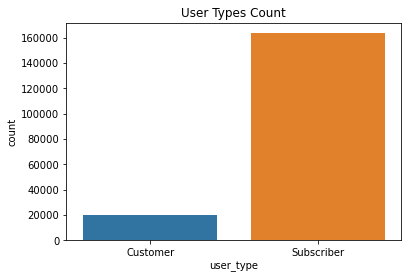

In [58]:
sb.countplot(data=df,x='user_type').set(title='User Types Count');

There are significantly more subscribers than customers.

<h4> 2- bike share for all trip </h4>

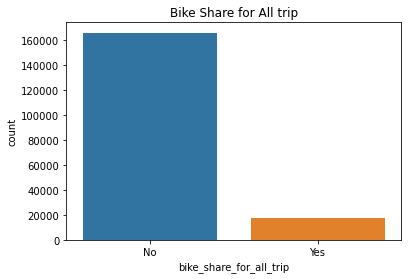

In [59]:
sb.countplot(data=df,x='bike_share_for_all_trip').set(title='Bike Share for All trip');

 This shows that this program is mostly used in cities.

<h4> 3- Weekly usage of the bike share system per user type </h4>

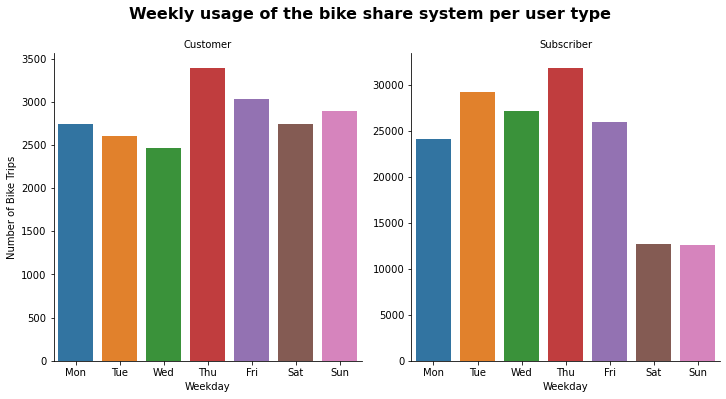

In [60]:
#Weekly usage of the bike share system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'];
graph = sb.catplot(data=df, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = weekday);
graph.set_axis_labels("Weekday", "Number of Bike Trips");
graph.fig.suptitle('Weekly usage of the bike share system per user type', y=1.06, fontsize=16, fontweight='semibold');
graph.set_titles("{col_name}");

-This graph shows that the Thursday is the most frequent day. 

-Also shows that Saturday and Sunday is usually not a busy day especially for subscribers.

<h4> 4- Distance Invistigation </h4>

In [61]:
#check the outliers

df['distance'].describe()

count    183412.000000
mean          0.016946
std           0.010926
min           0.000000
25%           0.009171
50%           0.014221
75%           0.022265
max           0.699399
Name: distance, dtype: float64

As we can see; the mean, min and max show that there are outliers. These outliers would result in poor quality graph

In [62]:
# define the clean data

clean_outliers = (df['distance'] <0.1)
outliers = df.loc[clean_outliers]

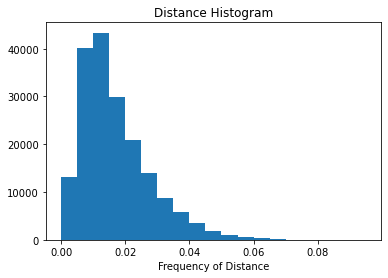

In [63]:
#Distance histogram

bins = np.arange(0, outliers['distance'].max(), 0.005);
plt.hist(data=outliers, x='distance', bins = bins);
plt.title('Distance Histogram');
plt.xlabel('Frequency of Distance');
plt.show();

Most of the distance data frequncy is short distance (between 0.01 and 0.03)

<h4>5- Duration Invistigation </h4>

In [64]:
#check the outliers

df.duration_hr.describe()

count    183412.000000
mean          0.201688
std           0.498442
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hr, dtype: float64

In [65]:
# define the clean data

clean_outliers = (df['duration_hr'] <1)
outliers = df.loc[clean_outliers]

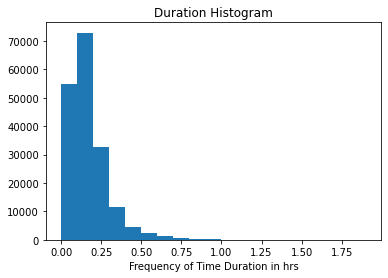

In [66]:
#Duration histogram

outliers = df.loc[clean_outliers]
bins = np.arange(0, outliers['duration_hr'].max()+1, 0.1)
plt.hist(data = outliers, x = 'duration_hr', bins = bins)
plt.title('Duration Histogram');
plt.xlabel('Frequency of Time Duration in hrs')
plt.show()

Most of the trips duration are less than half an hour

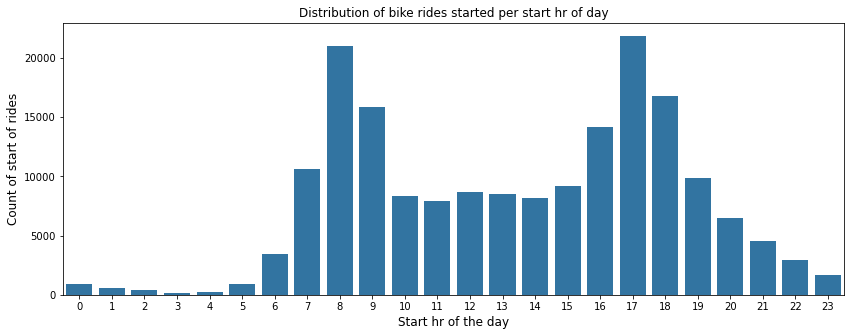

In [67]:
#Distribution plot of bike rides started per start hr of day

base_color = sb.color_palette()[0];
plt.figure(figsize=(14,5));
sb.countplot(data=df, x='start_hour_of_day', color=base_color);
plt.title('Distribution of bike rides started per start hr of day');
plt.xlabel('Start hr of the day', fontsize=12);
plt.ylabel('Count of start of rides', fontsize=12);

-The most busy hr is 17:00 (5 PM), second busy hour is 08:00 (8 AM). 

-The busy hours are 7-9 AM in morning and 4-6 PM in the evening.

-This make sense as the mentioned times are the most common times either for work or school. 

<h3> 4.2 Bivariate Exploration </h3>

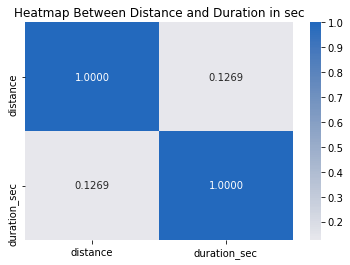

In [68]:
# heatmap between distance and duration in sec

sb.heatmap(df[['distance', 'duration_sec']].corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0).set(title='Heatmap Between Distance and Duration in sec');

The correlation between these two variables is low

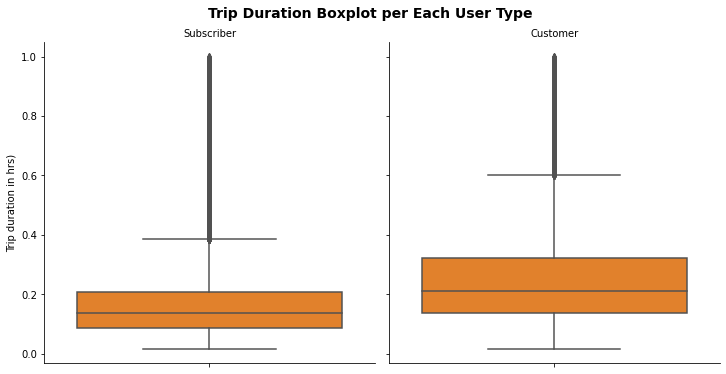

In [69]:
# Boxplot duration in sec distribution per user type
# As explained before, there are some outliers above 1 hr duration 

data = df.query('duration_hr < 1');
graph = sb.catplot(data=data, y='duration_hr', col="user_type", kind='box',
            color = sb.color_palette()[1]);
graph.fig.suptitle('Trip Duration Boxplot per Each User Type', y=1.03, fontsize=14, fontweight='semibold');
graph.set_titles(col_template = '{col_name}');
graph.set_axis_labels("", "Trip duration in hrs)");

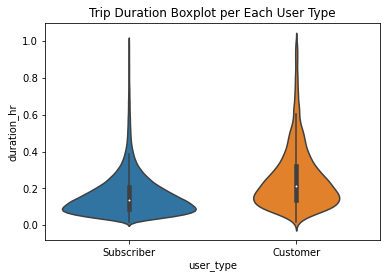

In [70]:
#same but using the violin plot

data = df.query('duration_hr < 1');
sb.violinplot(data=data, x='user_type', y='duration_hr').set(title='Trip Duration Boxplot per Each User Type');

-From the plots above, we can see that customers have a wider range of trip duration use for short trips than subscribers.

-We can also say that the durations for subsciber tends to be shorter compared to customers.

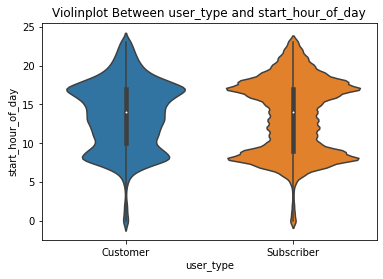

In [71]:
# violinplot between user_type and start_hour_of_day

sb.violinplot(data=df, x='user_type', y='start_hour_of_day').set(title='Violinplot Between user_type and start_hour_of_day');

-The most busy hrs are 5 PM and 8 AM for subscriber.

-The customers tend to use the service all the day between 8 Am and 6 pm.

<h3> 4.3 Multivariate Exploration </h3>

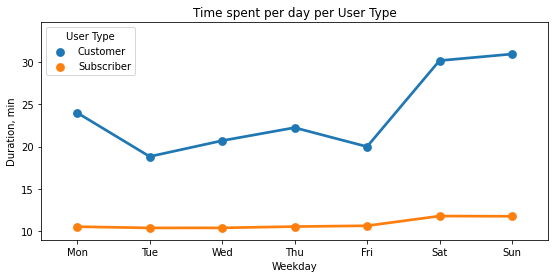

In [72]:
# plot the point plot of time spent per day per User Type

plt.figure(figsize=[20, 4]);
plt.subplot(1, 2, 1);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'];
sb.pointplot(data=df, x='start_time_weekday', y='duration_min', hue='user_type', errwidth=0,order = weekday);
plt.title('Time spent per day per User Type');
plt.xlabel('Weekday');
plt.ylabel('Duration, min');
plt.legend(title='User Type');

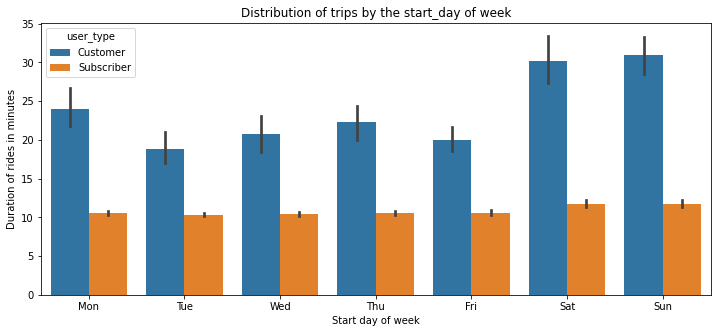

In [73]:
#Distribution of trips by the start day of week

plt.figure(figsize=(12,5));
base_color = sb.color_palette()[1];
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'];
sb.barplot(data=df, x='start_time_weekday', y='duration_min', hue='user_type',order = weekday);
plt.xlabel('Start day of week');
plt.ylabel('Duration of rides in minutes');
plt.title("Distribution of trips by the start_day of week");

-The clustered barchart above shows a significant higher trip duration during weekend days by Customers.

-Slightly higher trip duration during weekend days by subscribers.

In [74]:
# let us limit to the top 10 destinations:

top_dest = df['end_station_name'].value_counts().index[:10]
df_top_dest = df.loc[df['end_station_name'].isin(top_dest)]

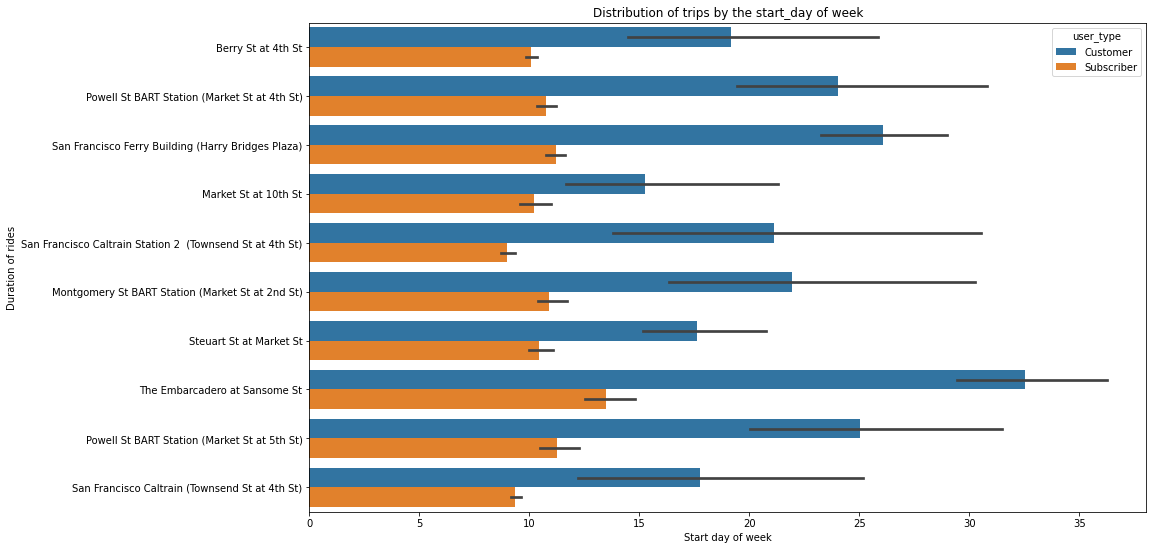

In [75]:
# Distribution of trips by the start day of week

plt.figure(figsize=(15,9));
base_color = sb.color_palette()[1];
sb.barplot(data=df_top_dest, y='end_station_name', x='duration_min', hue='user_type');
plt.title("Distribution of trips by the start_day of week");
plt.xlabel('Start day of week');
plt.ylabel('Duration of rides');

The bike trips by Customers take long in "The Embarcadero at Sansome St"

<h2> 5. Conclusions </h2>

* It is clear that each of these graphs support the hypothesis that customers are more like recreational users and subcribers tend to use them to go to work or school.

* Customers hire especially in the weekend.

* The bike trip duration of Customers is about the double of Subscribers.

* A significant higher trip duration during weekend days by Customers.

* Slightly higher trip duration during weekend days by subscribers.

* The bike trips by Customers take long in "The Embarcadero at Sansome St"